In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns


In [2]:
# Define the file path
file_path = r'Sales data.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)


In [3]:
df.head()


,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [4]:
df.tail()


,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
1495,B-25700,7,-3,2,Clothing,Hankerchief,COD
1496,B-25757,3151,-35,7,Clothing,Trousers,EMI
1497,B-25973,4141,1698,13,Electronics,Printers,COD
1498,B-25698,7,-2,1,Clothing,Hankerchief,COD
1499,B-25993,4363,305,5,Furniture,Tables,EMI


In [5]:
df.shape


(1500, 7)

In [6]:
# Get the number of columns
num_columns = len(df.columns)

print("Total columns present in the dataset:", num_columns)


Total columns present in the dataset: 7


In [7]:
# Get the column names
column_names = df.columns

print("Column names present in the dataset:")
for col in column_names:
    print(col)


Column names present in the dataset:
Order ID
Amount
Profit
Quantity
Category
Sub-Category
PaymentMode


In [8]:
# Find missing values in the DataFrame
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64


In [9]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

if num_duplicates > 0:
    print("There are", num_duplicates, "duplicate rows in the DataFrame.")
else:
    print("There are no duplicate rows in the DataFrame.")


There are no duplicate rows in the DataFrame.


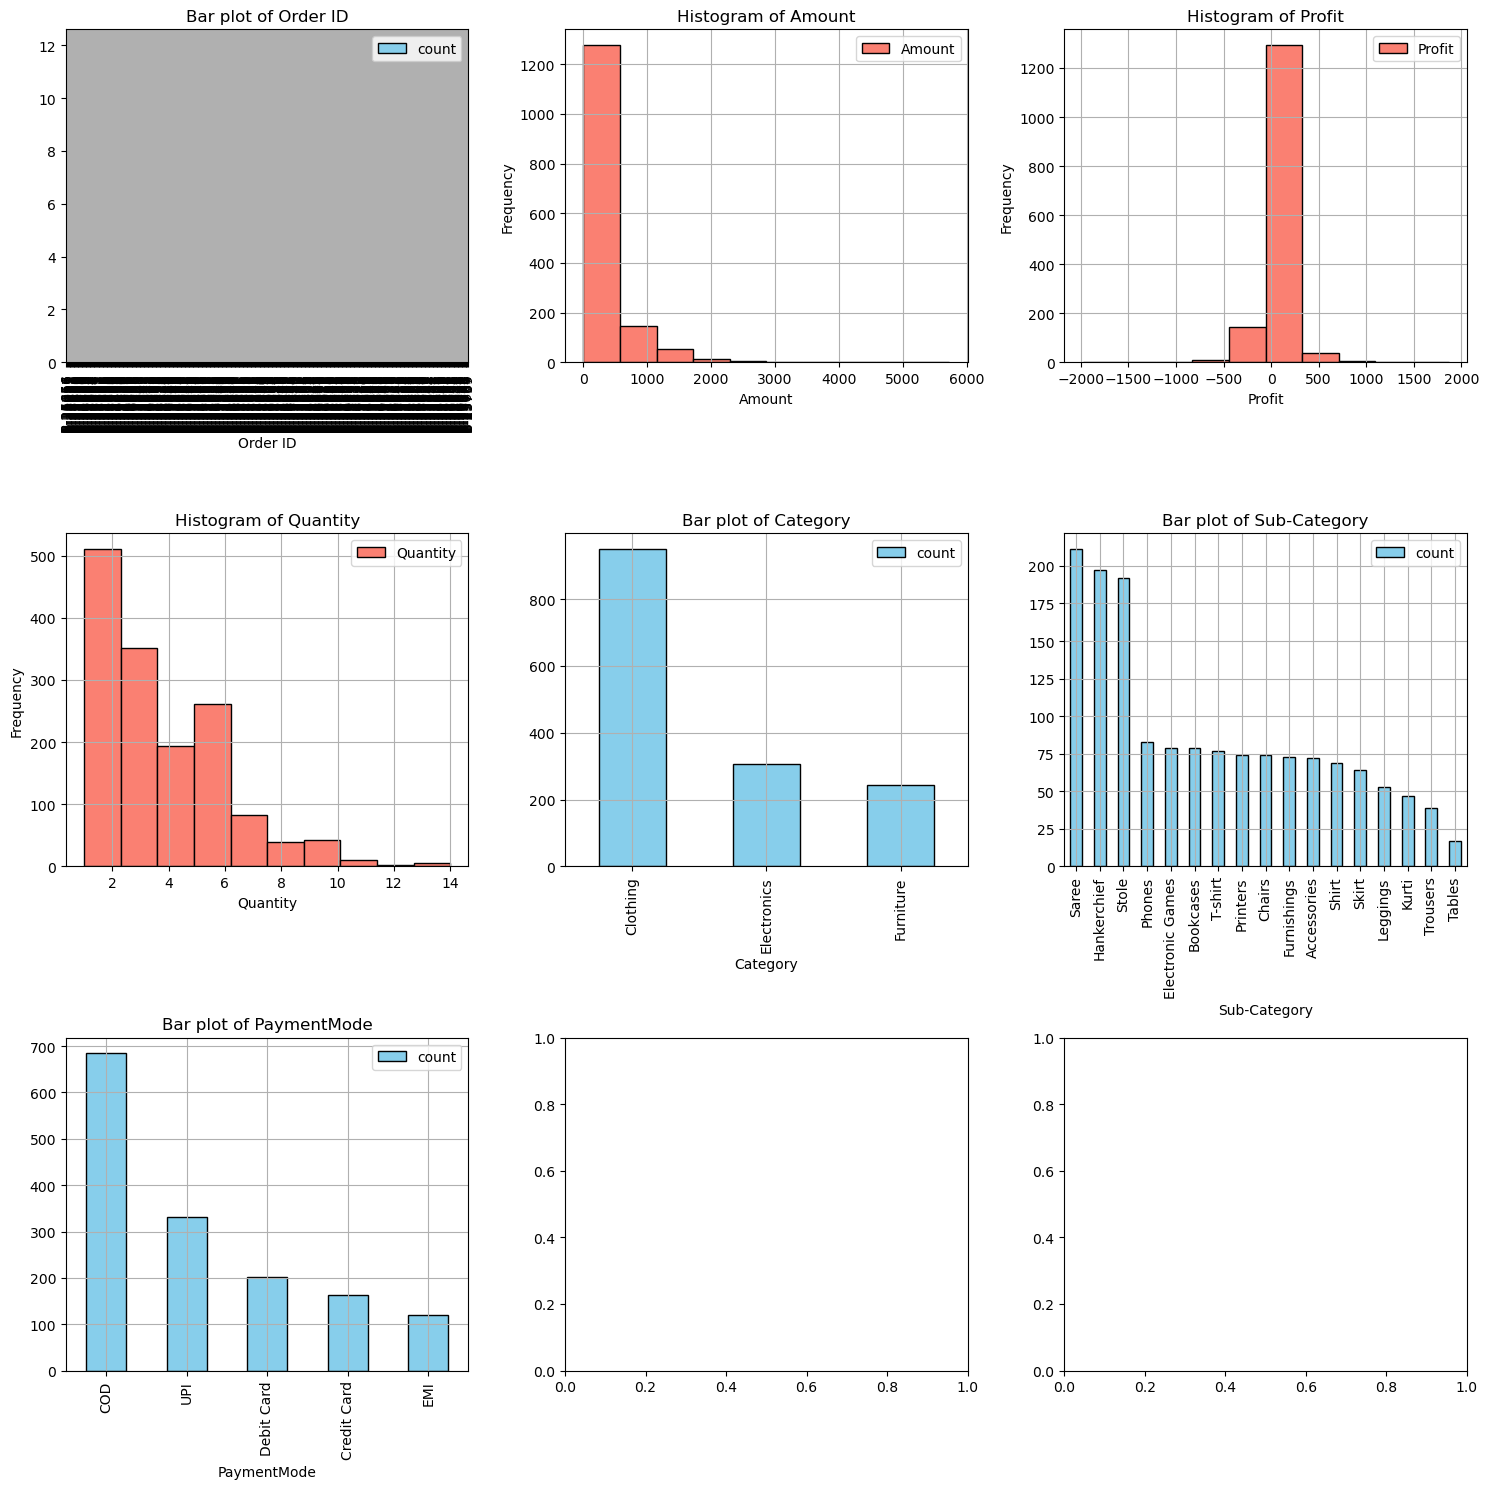

In [10]:
# Create a figure and axis object
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms and bar plots for each column
for i, column in enumerate(df.columns):
    ax = axes[i]
    if df[column].dtype == 'object':
        # Plot bar plot for categorical columns
        df[column].value_counts().plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
        ax.set_title(f'Bar plot of {column}')
    else:
        # Plot histogram for numerical columns
        df[column].plot(kind='hist', ax=ax, color='salmon', edgecolor='black')
        ax.set_title(f'Histogram of {column}')
        ax.set_xlabel(column)
    ax.grid(True)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [11]:
# Get the data types of columns
column_types = df.dtypes

# Separate numerical and categorical columns
numerical_columns = column_types[column_types != 'object'].index.tolist()
categorical_columns = column_types[column_types == 'object'].index.tolist()

# Print the list of numerical and categorical columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)


Numerical columns: ['Amount', 'Profit', 'Quantity']
Categorical columns: ['Order ID', 'Category', 'Sub-Category', 'PaymentMode']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


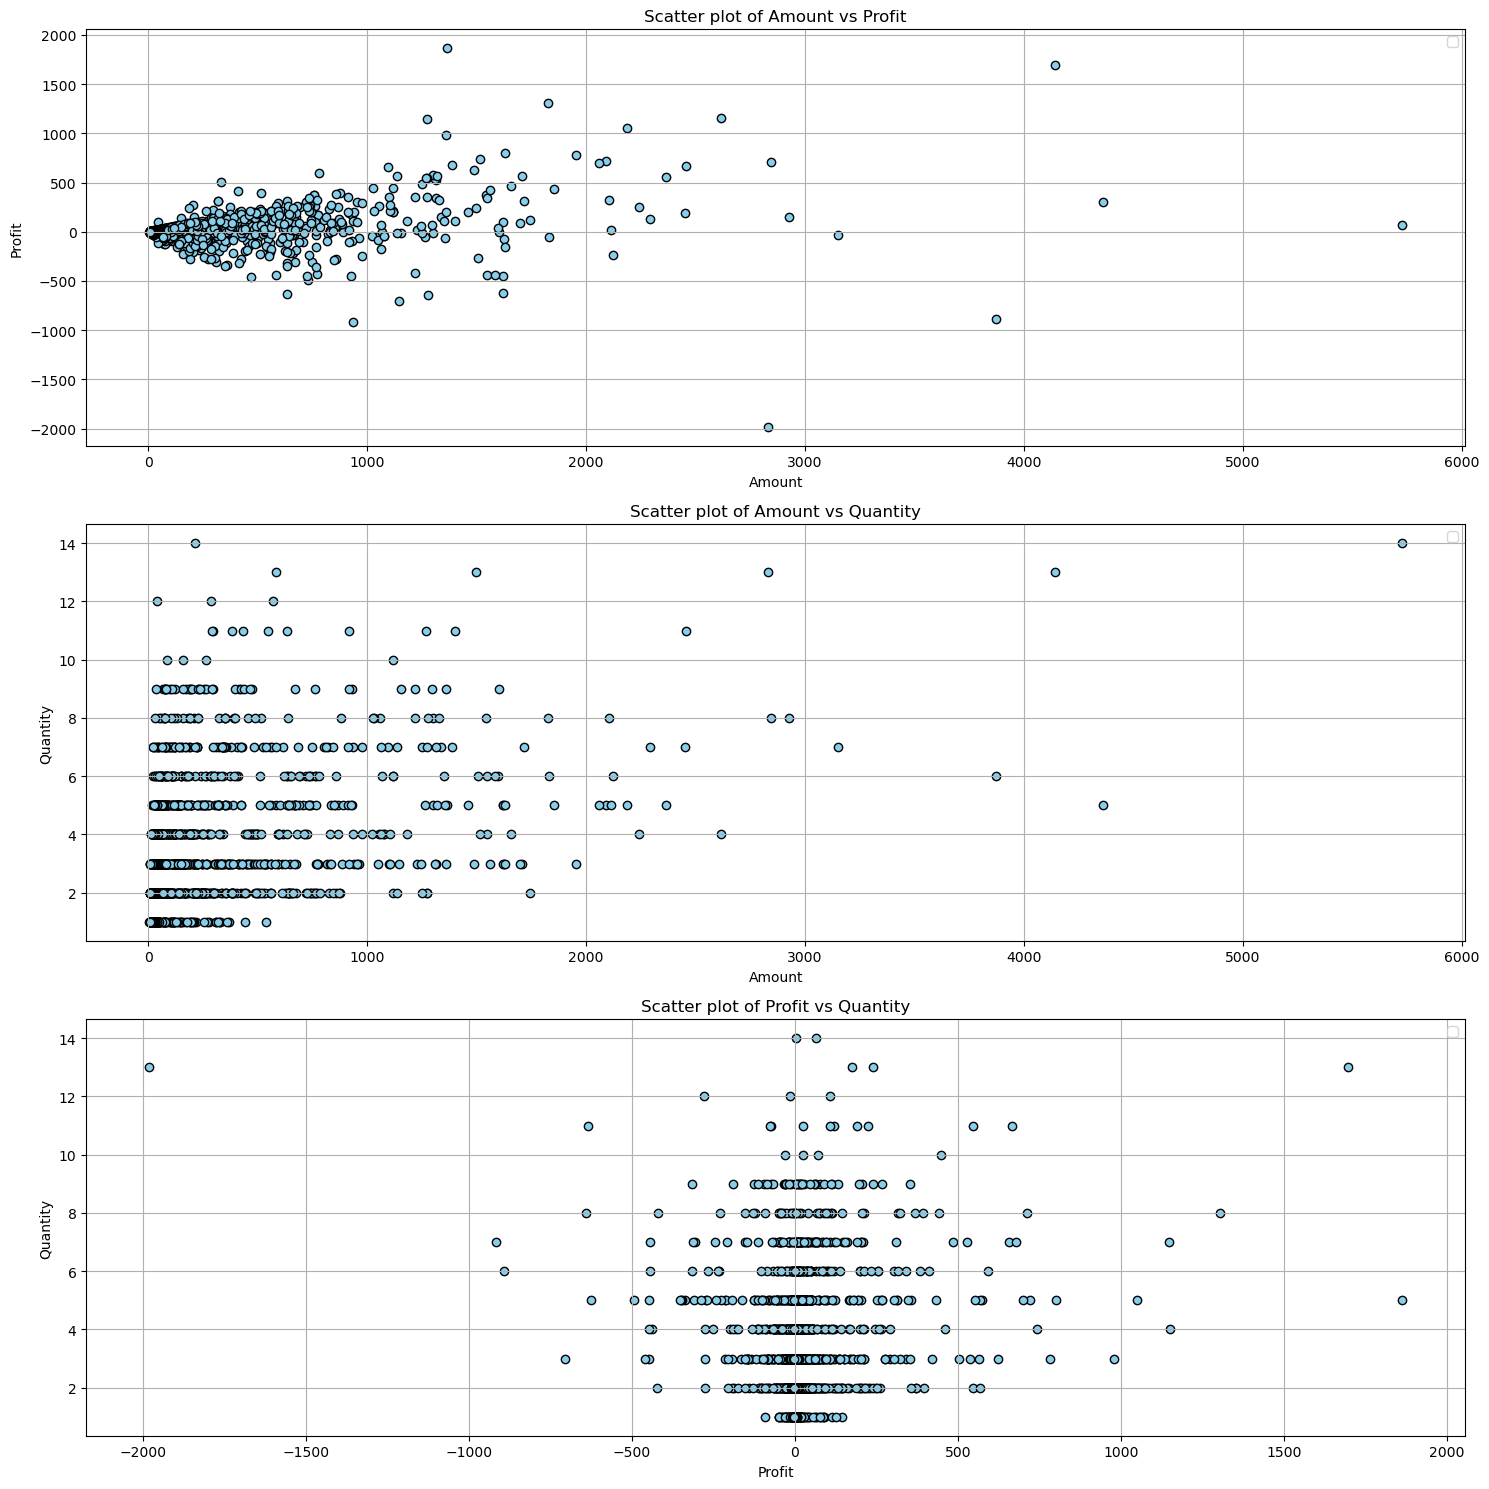

In [12]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a figure and axis object
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot scatter plots for each pair of numerical columns
for i, (x, y) in enumerate(itertools.combinations(numerical_columns, 2)):
    ax = axes[i]
    ax.scatter(df[x], df[y], color='skyblue', edgecolor='black')
    ax.set_title(f'Scatter plot of {x} vs {y}')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.grid(True)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()



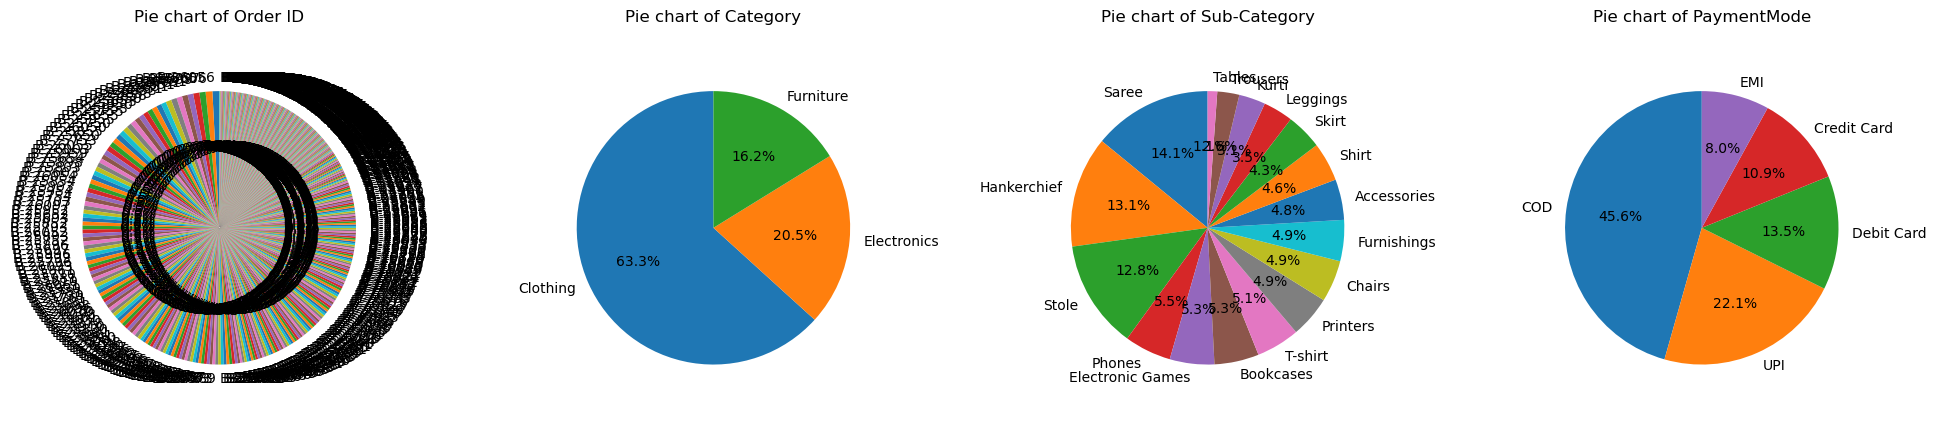

In [13]:
# Get categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate the number of rows and columns for subplots
num_columns = len(categorical_columns)
num_rows = 1

# Adjust the figure size based on the number of subplots
fig_width = 5 * num_columns
fig_height = 5

# Create a figure and axis object
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(fig_width, fig_height))

# Plot pie chart for each categorical column
for i, column in enumerate(categorical_columns):
    ax = axes[i] if num_columns > 1 else axes
    category_counts = df[column].value_counts()
    ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Pie chart of {column}')
    ax.axis('equal')  # Ensure pie chart is circular

# Adjust layout
plt.tight_layout(pad=3.0)  # Increase spacing between subplots
plt.show()


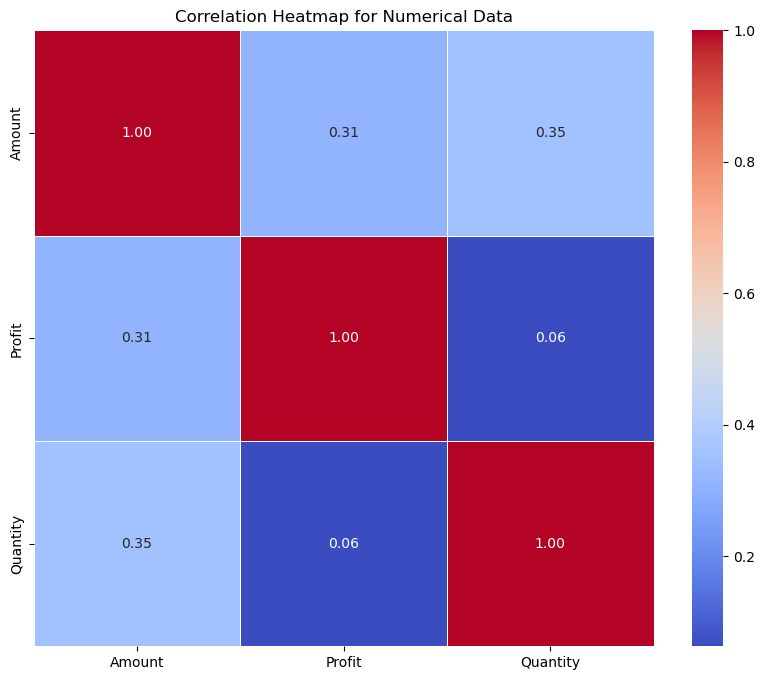

In [14]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap for numerical data
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Numerical Data')
plt.show()


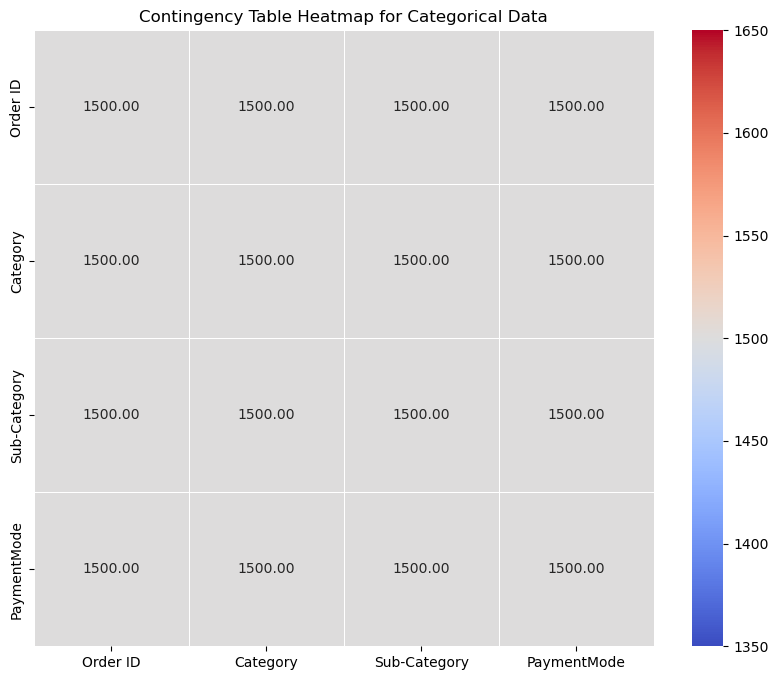

In [15]:
# Select only categorical columns
categorical_df = df.select_dtypes(include=['object'])

# Create a contingency table for categorical data
contingency_table = pd.DataFrame(index=categorical_df.columns, columns=categorical_df.columns)

for col1 in categorical_df.columns:
    for col2 in categorical_df.columns:
        contingency_table.loc[col1, col2] = pd.crosstab(categorical_df[col1], categorical_df[col2]).values.sum()

# Create a heatmap for categorical data
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Contingency Table Heatmap for Categorical Data')
plt.show()


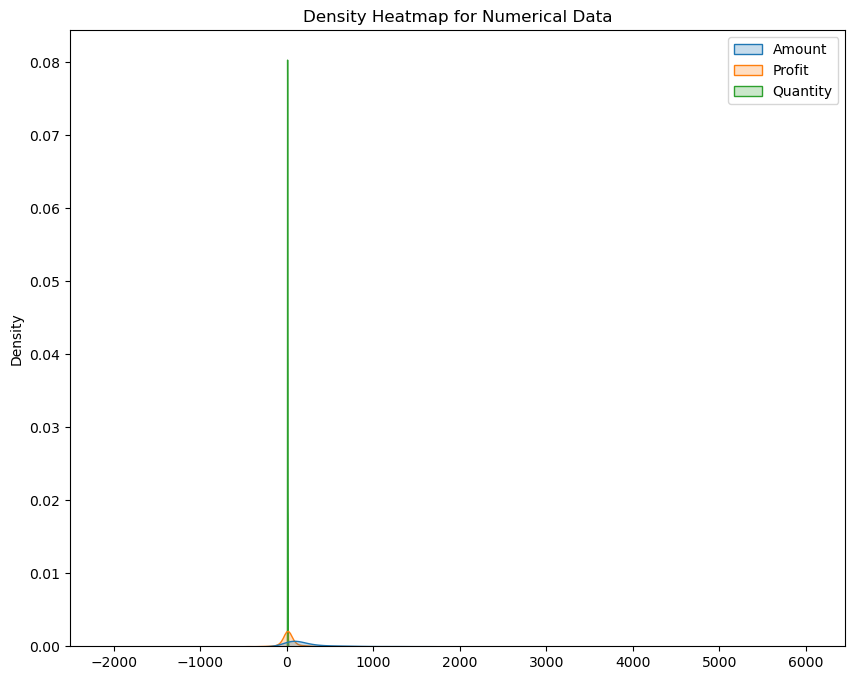

In [16]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Create a density heatmap for numerical data
plt.figure(figsize=(10, 8))
sns.kdeplot(data=numerical_df, fill=True)
plt.title('Density Heatmap for Numerical Data')
plt.show()


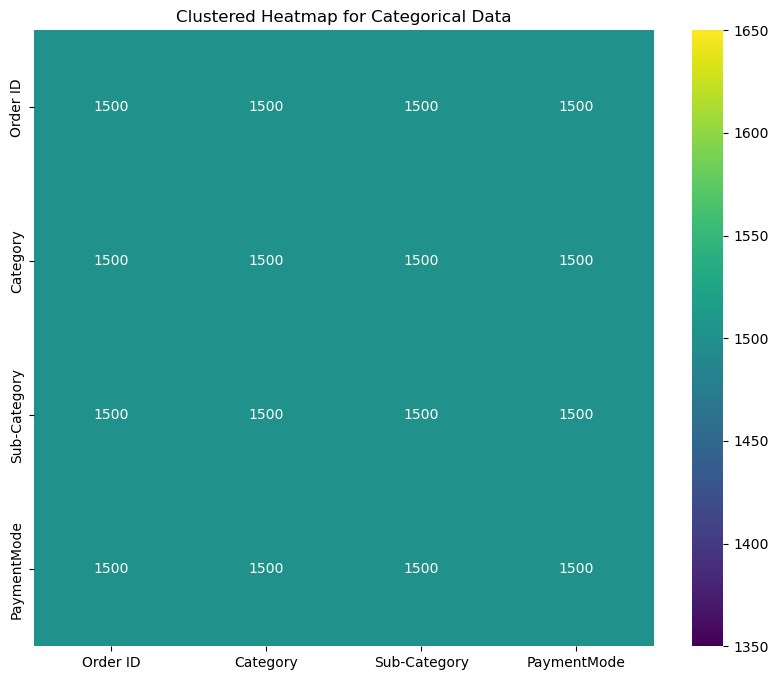

In [17]:
# Select only categorical columns
categorical_df = df.select_dtypes(include=['object'])

# Create a contingency table
contingency_table = pd.DataFrame(index=categorical_df.columns, columns=categorical_df.columns)

for col1 in categorical_df.columns:
    for col2 in categorical_df.columns:
        contingency_table.loc[col1, col2] = pd.crosstab(categorical_df[col1], categorical_df[col2]).values.sum()

# Create a clustered heatmap for the contingency table
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table.astype(float), cmap='viridis', annot=True, fmt=".0f")
plt.title('Clustered Heatmap for Categorical Data')
plt.show()


In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
def load_data(file_path):
    return pd.read_csv(file_path)

# Preprocess the data
def preprocess_data(data):
    X = data.drop('PaymentMode', axis=1)  
    y = data['PaymentMode']
    X_encoded = pd.get_dummies(X)
    return X_encoded, y

# Split data into train and test sets
def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
def train_model(X_train, y_train):
    svm_classifier = SVC(kernel='linear', random_state=42)
    svm_classifier.fit(X_train, y_train)
    return svm_classifier

# Make predictions
def make_predictions(model, X_test):
    return model.predict(X_test)

# Evaluate the model
def evaluate_model(y_test, predictions):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    return accuracy, precision, recall, f1

# Create confusion matrix
def create_confusion_matrix(y_test, predictions):
    cm = confusion_matrix(y_test, predictions)
    return cm

# Plot confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Main function to run the code
def main():
    file_path = 'Sales data.csv'
    data = load_data(file_path)
    X, y = preprocess_data(data)
    X_train, X_test, y_train, y_test = split_data(X, y)
    model = train_model(X_train, y_train)
    predictions = make_predictions(model, X_test)
    accuracy, precision, recall, f1 = evaluate_model(y_test, predictions)
    cm = create_confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cm)

if __name__ == "__main__":
    main()


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
data = pd.read_csv('Sales data.csv')

# Assuming 'PaymentMode' is the target variable
X = data.drop('PaymentMode', axis=1)  
y = data['PaymentMode']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Predict probabilities
y_probs = svm_classifier.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(svm_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_test == svm_classifier.classes_[i]), y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Make predictions
predictions = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
